# Machine Learning Engineer Nanodegree
## Unsupervised Learning
## Project: Creating Customer Segments

Welcome to the third project of the Machine Learning Engineer Nanodegree! In this notebook, some template code has already been provided for you, and it will be your job to implement the additional functionality necessary to successfully complete this project. Sections that begin with **'Implementation'** in the header indicate that the following block of code will require additional functionality which you must provide. Instructions will be provided for each section and the specifics of the implementation are marked in the code block with a `'TODO'` statement. Please be sure to read the instructions carefully!

In addition to implementing code, there will be questions that you must answer which relate to the project and your implementation. Each section where you will answer a question is preceded by a **'Question X'** header. Carefully read each question and provide thorough answers in the following text boxes that begin with **'Answer:'**. Your project submission will be evaluated based on your answers to each of the questions and the implementation you provide.  

>**Note:** Code and Markdown cells can be executed using the **Shift + Enter** keyboard shortcut. In addition, Markdown cells can be edited by typically double-clicking the cell to enter edit mode.

## Getting Started

In this project, you will analyze a dataset containing data on various customers' annual spending amounts (reported in *monetary units*) of diverse product categories for internal structure. One goal of this project is to best describe the variation in the different types of customers that a wholesale distributor interacts with. Doing so would equip the distributor with insight into how to best structure their delivery service to meet the needs of each customer.

The dataset for this project can be found on the [UCI Machine Learning Repository](https://archive.ics.uci.edu/ml/datasets/Wholesale+customers). For the purposes of this project, the features `'Channel'` and `'Region'` will be excluded in the analysis — with focus instead on the six product categories recorded for customers.

Run the code block below to load the wholesale customers dataset, along with a few of the necessary Python libraries required for this project. You will know the dataset loaded successfully if the size of the dataset is reported.

In [159]:
# Import libraries necessary for this project
import numpy as np
import pandas as pd
from IPython.display import display # Allows the use of display() for DataFrames

# Import supplementary visualizations code visuals.py
import visuals as vs

# Pretty display for notebooks
%matplotlib inline

# Load the wholesale customers dataset
try:
    data = pd.read_csv("customers.csv")
    data.drop(['Region', 'Channel'], axis = 1, inplace = True)
    print("Wholesale customers dataset has {} samples with {} features each.".format(*data.shape))
except:
    print("Dataset could not be loaded. Is the dataset missing?")

Wholesale customers dataset has 440 samples with 6 features each.


## Data Exploration
In this section, you will begin exploring the data through visualizations and code to understand how each feature is related to the others. You will observe a statistical description of the dataset, consider the relevance of each feature, and select a few sample data points from the dataset which you will track through the course of this project.

Run the code block below to observe a statistical description of the dataset. Note that the dataset is composed of six important product categories: **'Fresh'**, **'Milk'**, **'Grocery'**, **'Frozen'**, **'Detergents_Paper'**, and **'Delicatessen'**. Consider what each category represents in terms of products you could purchase.

In [160]:
# Display a description of the dataset
display(data.describe())

Fresh          Milk       Grocery        Frozen  \
count     440.000000    440.000000    440.000000    440.000000   
mean    12000.297727   5796.265909   7951.277273   3071.931818   
std     12647.328865   7380.377175   9503.162829   4854.673333   
min         3.000000     55.000000      3.000000     25.000000   
25%      3127.750000   1533.000000   2153.000000    742.250000   
50%      8504.000000   3627.000000   4755.500000   1526.000000   
75%     16933.750000   7190.250000  10655.750000   3554.250000   
max    112151.000000  73498.000000  92780.000000  60869.000000   

       Detergents_Paper  Delicatessen  
count        440.000000    440.000000  
mean        2881.493182   1524.870455  
std         4767.854448   2820.105937  
min            3.000000      3.000000  
25%          256.750000    408.250000  
50%          816.500000    965.500000  
75%         3922.000000   1820.250000  
max        40827.000000  47943.000000

### Implementation: Selecting Samples
To get a better understanding of the customers and how their data will transform through the analysis, it would be best to select a few sample data points and explore them in more detail. In the code block below, add **three** indices of your choice to the `indices` list which will represent the customers to track. It is suggested to try different sets of samples until you obtain customers that vary significantly from one another.

In [161]:
# TODO: Select three indices of your choice you wish to sample from the dataset
indices = [0,10,439]

# Create a DataFrame of the chosen samples
samples = pd.DataFrame(data.loc[indices], columns = data.keys()).reset_index(drop = True)
print("Chosen samples of wholesale customers dataset:")
display(samples)

Chosen samples of wholesale customers dataset:


Fresh  Milk  Grocery  Frozen  Detergents_Paper  Delicatessen
0  12669  9656     7561     214              2674          1338
1   3366  5403    12974    4400              5977          1744
2   2787  1698     2510      65               477            52

### Question 1
Consider the total purchase cost of each product category and the statistical description of the dataset above for your sample customers.  

* What kind of establishment (customer) could each of the three samples you've chosen represent?

**Hint:** Examples of establishments include places like markets, cafes, delis, wholesale retailers, among many others. Avoid using names for establishments, such as saying *"McDonalds"* when describing a sample customer as a restaurant. You can use the mean values for reference to compare your samples with. The mean values are as follows:

* Fresh: 12000.2977
* Milk: 5796.2
* Grocery: 7951.3
* Detergents_paper: 2881.4
* Delicatessen: 1524.8

Knowing this, how do your samples compare? Does that help in driving your insight into what kind of establishments they might be? 


**Answer:**

0:	12669	9656	7561	214	2674	1338

This may be restaurants based on the mean value of the fresh products of 12000, the groceries are somewhat close to the mean, the milk is much considerable than the mean. Maybe a restaurant with an ice cream store attached to it. Thi also could be a hotel with arestaurant and ice cream shop. 

1:	3366	5403	12974	4400	5977	1744

This is maybe a grocery store. Based on the crocery product, milk, detergents papers and it's corresponding mean.

2:	2787	1698	2510	65	477	52

This could be a food truck. There are much less expenditure relative to the mean for groceries, fresh, detergents paper and delicatessen.


### Implementation: Feature Relevance
One interesting thought to consider is if one (or more) of the six product categories is actually relevant for understanding customer purchasing. That is to say, is it possible to determine whether customers purchasing some amount of one category of products will necessarily purchase some proportional amount of another category of products? We can make this determination quite easily by training a supervised regression learner on a subset of the data with one feature removed, and then score how well that model can predict the removed feature.

In the code block below, you will need to implement the following:
 - Assign `new_data` a copy of the data by removing a feature of your choice using the `DataFrame.drop` function.
 - Use `sklearn.cross_validation.train_test_split` to split the dataset into training and testing sets.
   - Use the removed feature as your target label. Set a `test_size` of `0.25` and set a `random_state`.
 - Import a decision tree regressor, set a `random_state`, and fit the learner to the training data.
 - Report the prediction score of the testing set using the regressor's `score` function.

### Question 2

* Which feature did you attempt to predict?
* What was the reported prediction score?
* Is this feature necessary for identifying customers' spending habits?



**Hint:** The coefficient of determination, R^2, is scored between 0 and 1, with 1 being a perfect fit. A negative R^2 implies the model fails to fit the data. If you get a low score for a particular feature, that lends us to beleive that that feature point is hard to predict using the other features, thereby making it an important feature to consider when considering relevance.

In [162]:
from sklearn.tree import DecisionTreeRegressor
from sklearn.metrics import fbeta_score, make_scorer
from sklearn.model_selection import train_test_split

# TODO: Make a copy of the DataFrame, using the 'drop' function to drop the given feature
new_data = data.drop(['Milk'], axis = 1)

# TODO: Split the data into training and testing sets(0.25) using the given feature as the target
# Set a random state.
X_train, X_test, y_train, y_test =  train_test_split(new_data, data['Milk'], 
                                                    test_size = 0.25, 
                                                    random_state = 42)

# TODO: Create a decision tree regressor and fit it to the training set
regressor = DecisionTreeRegressor(random_state=42)
regressor.fit(X_train,y_train)

# TODO: Report the score of the prediction using the testing set
score = regressor.score(X_test, y_test)

print("Milk score:",  score)

Milk score: 0.15627539501732116


**Answer:**

Which feature did you attempt to predict? 

I selected the Milk feature to predict. I also plugged in the other features to compare. The Grocery feature has the highest score and  explains best the variance (0.6).


* What was the reported prediction score? 

The prediction score was 0.15627539501732116


* Is this feature necessary for identifying customers' spending habits?

I consider this feature to be necessary in order to identify customers' spending habits since it has a relatively low score, I would also keep the other features since they score relatively low. The Grocery feature is not necessary and in my opinion should be droped since there is a high correlation between this features and the other ones.


### Visualize Feature Distributions
To get a better understanding of the dataset, we can construct a scatter matrix of each of the six product features present in the data. If you found that the feature you attempted to predict above is relevant for identifying a specific customer, then the scatter matrix below may not show any correlation between that feature and the others. Conversely, if you believe that feature is not relevant for identifying a specific customer, the scatter matrix might show a correlation between that feature and another feature in the data. Run the code block below to produce a scatter matrix.

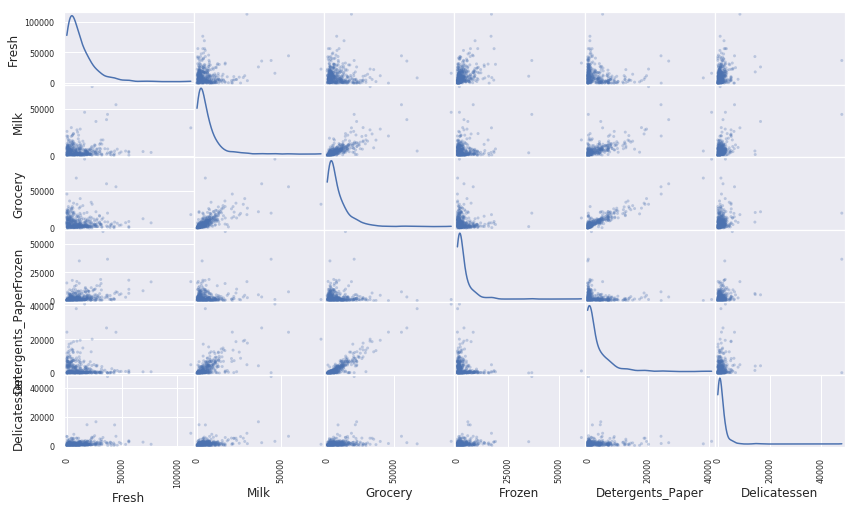

In [163]:
# Produce a scatter matrix for each pair of features in the data
pd.plotting.scatter_matrix(data, alpha = 0.3, figsize = (14,8), diagonal = 'kde');

### Question 3
* Using the scatter matrix as a reference, discuss the distribution of the dataset, specifically talk about the normality, outliers, large number of data points near 0 among others. If you need to sepearate out some of the plots individually to further accentuate your point, you may do so as well.
* Are there any pairs of features which exhibit some degree of correlation? 
* Does this confirm or deny your suspicions about the relevance of the feature you attempted to predict? 
* How is the data for those features distributed?

**Hint:** Is the data normally distributed? Where do most of the data points lie? You can use [corr()](https://pandas.pydata.org/pandas-docs/stable/generated/pandas.DataFrame.corr.html) to get the feature correlations and then visualize them using a [heatmap](http://seaborn.pydata.org/generated/seaborn.heatmap.html)(the data that would be fed into the heatmap would be the correlation values, for eg: `data.corr()`) to gain further insight.

**Answer:**

* Using the scatter matrix as a reference, discuss the distribution of the dataset, specifically talk about the normality, outliers, large number of data points near 0 among others. If you need to sepearate out some of the plots individually to further accentuate your point, you may do so as well.

The features look skewed to the left and do not follow a normal distribution. There a large number of data points that are near 0 and some plots show a number of outliers (e.g. Grocery/Milk plot)

* Are there any pairs of features which exhibit some degree of correlation?

Yes, there are some pair of feature that exhibit some degree of correlation for example the Grocery/Detergents_paper, Grocery/Milk, Detergents_paper/Milk

* Does this confirm or deny your suspicions about the relevance of the feature you attempted to predict?

Yes, it does confirm that the Milk feature that I chose to predict is relevant since it has some correlation with only two other features namely (Grocery and Detergents_paper). See heat map below.

* How is the data for those features distributed?

Looking at the scatter plot, the data for those pairs of features seem to be distibuted linearly.




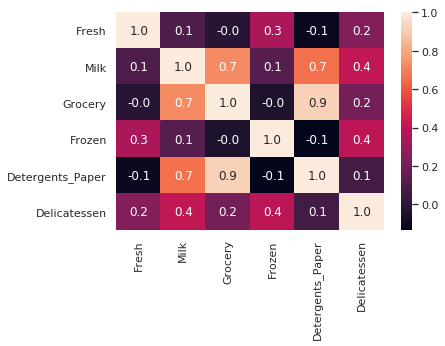

In [164]:
import seaborn as sns; sns.set()

ax = sns.heatmap(data.corr(), annot=True, fmt="0.1f")

## Data Preprocessing
In this section, you will preprocess the data to create a better representation of customers by performing a scaling on the data and detecting (and optionally removing) outliers. Preprocessing data is often times a critical step in assuring that results you obtain from your analysis are significant and meaningful.

### Implementation: Feature Scaling
If data is not normally distributed, especially if the mean and median vary significantly (indicating a large skew), it is most [often appropriate](http://econbrowser.com/archives/2014/02/use-of-logarithms-in-economics) to apply a non-linear scaling — particularly for financial data. One way to achieve this scaling is by using a [Box-Cox test](http://scipy.github.io/devdocs/generated/scipy.stats.boxcox.html), which calculates the best power transformation of the data that reduces skewness. A simpler approach which can work in most cases would be applying the natural logarithm.

In the code block below, you will need to implement the following:
 - Assign a copy of the data to `log_data` after applying logarithmic scaling. Use the `np.log` function for this.
 - Assign a copy of the sample data to `log_samples` after applying logarithmic scaling. Again, use `np.log`.

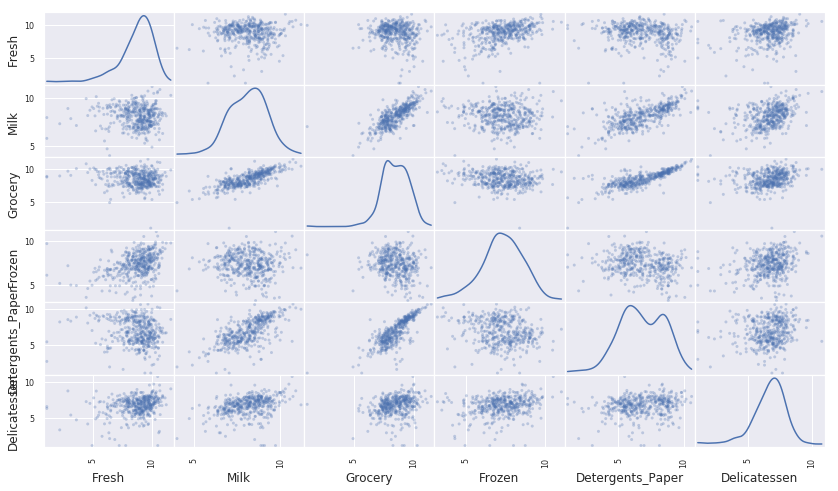

In [165]:
# TODO: Scale the data using the natural logarithm
log_data = np.log(data)

# TODO: Scale the sample data using the natural logarithm
log_samples = np.log(samples)

# Produce a scatter matrix for each pair of newly-transformed features
pd.plotting.scatter_matrix(log_data, alpha = 0.3, figsize = (14,8), diagonal = 'kde');

### Observation
After applying a natural logarithm scaling to the data, the distribution of each feature should appear much more normal. For any pairs of features you may have identified earlier as being correlated, observe here whether that correlation is still present (and whether it is now stronger or weaker than before).

Run the code below to see how the sample data has changed after having the natural logarithm applied to it.

In [166]:
# Display the log-transformed sample data
display(log_samples)

Fresh      Milk   Grocery    Frozen  Detergents_Paper  Delicatessen
0  9.446913  9.175335  8.930759  5.365976          7.891331      7.198931
1  8.121480  8.594710  9.470703  8.389360          8.695674      7.463937
2  7.932721  7.437206  7.828038  4.174387          6.167516      3.951244

### Implementation: Outlier Detection
Detecting outliers in the data is extremely important in the data preprocessing step of any analysis. The presence of outliers can often skew results which take into consideration these data points. There are many "rules of thumb" for what constitutes an outlier in a dataset. Here, we will use [Tukey's Method for identfying outliers](http://datapigtechnologies.com/blog/index.php/highlighting-outliers-in-your-data-with-the-tukey-method/): An *outlier step* is calculated as 1.5 times the interquartile range (IQR). A data point with a feature that is beyond an outlier step outside of the IQR for that feature is considered abnormal.

In the code block below, you will need to implement the following:
 - Assign the value of the 25th percentile for the given feature to `Q1`. Use `np.percentile` for this.
 - Assign the value of the 75th percentile for the given feature to `Q3`. Again, use `np.percentile`.
 - Assign the calculation of an outlier step for the given feature to `step`.
 - Optionally remove data points from the dataset by adding indices to the `outliers` list.

**NOTE:** If you choose to remove any outliers, ensure that the sample data does not contain any of these points!  
Once you have performed this implementation, the dataset will be stored in the variable `good_data`.

In [179]:
# For each feature find the data points with extreme high or low values
for feature in log_data.keys():
    
    # TODO: Calculate Q1 (25th percentile of the data) for the given feature
    Q1 = np.percentile(log_data[feature], 25)
    
    # TODO: Calculate Q3 (75th percentile of the data) for the given feature
    Q3 = np.percentile(log_data[feature], 75)
    
    # TODO: Use the interquartile range to calculate an outlier step (1.5 times the interquartile range)
    step = 1.5*(Q3-Q1)
    
    # Display the outliers
    print("Data points considered outliers for the feature '{}':".format(feature))
    display(log_data[~((log_data[feature] >= Q1 - step) & (log_data[feature] <= Q3 + step))])
    
# OPTIONAL: Select the indices for data points you wish to remove
outliers  = [65,66,75,128,154]

# Remove the outliers, if any were specified
good_data = log_data.drop(log_data.index[outliers]).reset_index(drop = True)

Data points considered outliers for the feature 'Fresh':


Fresh       Milk    Grocery    Frozen  Detergents_Paper  Delicatessen
65   4.442651   9.950323  10.732651  3.583519         10.095388      7.260523
66   2.197225   7.335634   8.911530  5.164786          8.151333      3.295837
81   5.389072   9.163249   9.575192  5.645447          8.964184      5.049856
95   1.098612   7.979339   8.740657  6.086775          5.407172      6.563856
96   3.135494   7.869402   9.001839  4.976734          8.262043      5.379897
128  4.941642   9.087834   8.248791  4.955827          6.967909      1.098612
171  5.298317  10.160530   9.894245  6.478510          9.079434      8.740337
193  5.192957   8.156223   9.917982  6.865891          8.633731      6.501290
218  2.890372   8.923191   9.629380  7.158514          8.475746      8.759669
304  5.081404   8.917311  10.117510  6.424869          9.374413      7.787382
305  5.493061   9.468001   9.088399  6.683361          8.271037      5.351858
338  1.098612   5.808142   8.856661  9.655090          2.708050      6.309918
353  4.762174   8.742574   9.961898  5.429346          9.069007      7.013016
355  5.247024   6.588926   7.606885  5.501258          5.214936      4.844187
357  3.610918   7.150701  10.011086  4.919981          8.816853      4.700480
412  4.574711   8.190077   9.425452  4.584967          7.996317      4.127134

Data points considered outliers for the feature 'Milk':


Fresh       Milk    Grocery    Frozen  Detergents_Paper  Delicatessen
86   10.039983  11.205013  10.377047  6.894670          9.906981      6.805723
98    6.220590   4.718499   6.656727  6.796824          4.025352      4.882802
154   6.432940   4.007333   4.919981  4.317488          1.945910      2.079442
356  10.029503   4.897840   5.384495  8.057377          2.197225      6.306275

Data points considered outliers for the feature 'Grocery':


Fresh      Milk   Grocery    Frozen  Detergents_Paper  Delicatessen
75   9.923192  7.036148  1.098612  8.390949          1.098612      6.882437
154  6.432940  4.007333  4.919981  4.317488          1.945910      2.079442

Data points considered outliers for the feature 'Frozen':


Fresh      Milk    Grocery     Frozen  Detergents_Paper  Delicatessen
38    8.431853  9.663261   9.723703   3.496508          8.847360      6.070738
57    8.597297  9.203618   9.257892   3.637586          8.932213      7.156177
65    4.442651  9.950323  10.732651   3.583519         10.095388      7.260523
145  10.000569  9.034080  10.457143   3.737670          9.440738      8.396155
175   7.759187  8.967632   9.382106   3.951244          8.341887      7.436617
264   6.978214  9.177714   9.645041   4.110874          8.696176      7.142827
325  10.395650  9.728181   9.519735  11.016479          7.148346      8.632128
420   8.402007  8.569026   9.490015   3.218876          8.827321      7.239215
429   9.060331  7.467371   8.183118   3.850148          4.430817      7.824446
439   7.932721  7.437206   7.828038   4.174387          6.167516      3.951244

Data points considered outliers for the feature 'Detergents_Paper':


Fresh      Milk   Grocery    Frozen  Detergents_Paper  Delicatessen
75   9.923192  7.036148  1.098612  8.390949          1.098612      6.882437
161  9.428190  6.291569  5.645447  6.995766          1.098612      7.711101

Data points considered outliers for the feature 'Delicatessen':


Fresh       Milk    Grocery     Frozen  Detergents_Paper  \
66    2.197225   7.335634   8.911530   5.164786          8.151333   
109   7.248504   9.724899  10.274568   6.511745          6.728629   
128   4.941642   9.087834   8.248791   4.955827          6.967909   
137   8.034955   8.997147   9.021840   6.493754          6.580639   
142  10.519646   8.875147   9.018332   8.004700          2.995732   
154   6.432940   4.007333   4.919981   4.317488          1.945910   
183  10.514529  10.690808   9.911952  10.505999          5.476464   
184   5.789960   6.822197   8.457443   4.304065          5.811141   
187   7.798933   8.987447   9.192075   8.743372          8.148735   
203   6.368187   6.529419   7.703459   6.150603          6.860664   
233   6.871091   8.513988   8.106515   6.842683          6.013715   
285  10.602965   6.461468   8.188689   6.948897          6.077642   
289  10.663966   5.655992   6.154858   7.235619          3.465736   
343   7.431892   8.848509  10.177932   7.283448          9.646593   

     Delicatessen  
66       3.295837  
109      1.098612  
128      1.098612  
137      3.583519  
142      1.098612  
154      2.079442  
183     10.777768  
184      2.397895  
187      1.098612  
203      2.890372  
233      1.945910  
285      2.890372  
289      3.091042  
343      3.610918

### Question 4
* Are there any data points considered outliers for more than one feature based on the definition above? 
* Should these data points be removed from the dataset? 
* If any data points were added to the `outliers` list to be removed, explain why.

** Hint: ** If you have datapoints that are outliers in multiple categories think about why that may be and if they warrant removal. Also note how k-means is affected by outliers and whether or not this plays a factor in your analysis of whether or not to remove them.

**Answer:**


* Are there any data points considered outliers for more than one feature based on the definition above?

Yes, the following data points are outliers for more than one feature: [65,66,75,128,154]


* Should these data points be removed from the dataset?

Yes, they should be removed


* If any data points were added to the outliers list to be removed, explain why.

Outliers end up impacting the cluster centers and lower the scores as their distance from the center is unusually high. http://www.math.uconn.edu/~gan/ggpaper/gan2017kmor.pdf



## Feature Transformation
In this section you will use principal component analysis (PCA) to draw conclusions about the underlying structure of the wholesale customer data. Since using PCA on a dataset calculates the dimensions which best maximize variance, we will find which compound combinations of features best describe customers.

### Implementation: PCA

Now that the data has been scaled to a more normal distribution and has had any necessary outliers removed, we can now apply PCA to the `good_data` to discover which dimensions about the data best maximize the variance of features involved. In addition to finding these dimensions, PCA will also report the *explained variance ratio* of each dimension — how much variance within the data is explained by that dimension alone. Note that a component (dimension) from PCA can be considered a new "feature" of the space, however it is a composition of the original features present in the data.

In the code block below, you will need to implement the following:
 - Import `sklearn.decomposition.PCA` and assign the results of fitting PCA in six dimensions with `good_data` to `pca`.
 - Apply a PCA transformation of `log_samples` using `pca.transform`, and assign the results to `pca_samples`.

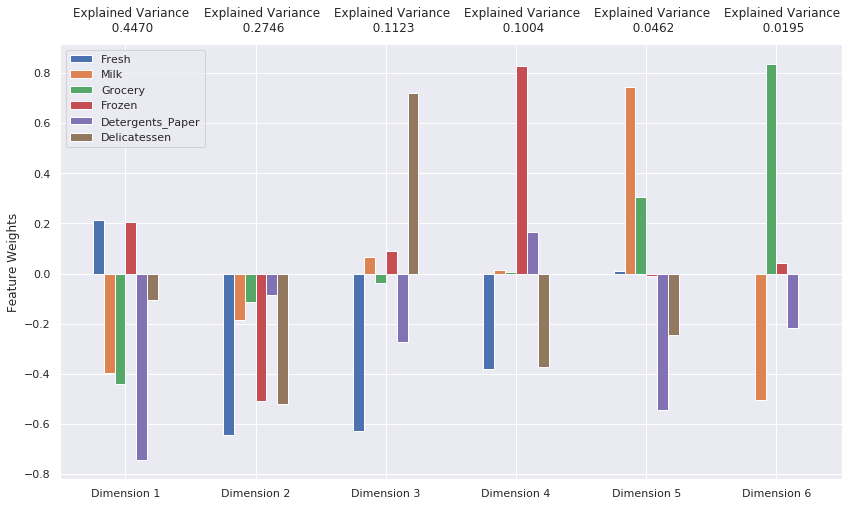

In [180]:
from sklearn.decomposition import PCA
# TODO: Apply PCA by fitting the good data with the same number of dimensions as features
pca = PCA(n_components=len(good_data.columns)).fit(good_data)

# TODO: Transform log_samples using the PCA fit above
pca_samples = pca.transform(log_samples)

# Generate PCA results plot
pca_results = vs.pca_results(good_data, pca)

### Question 5

* How much variance in the data is explained* **in total** *by the first and second principal component? 
* How much variance in the data is explained by the first four principal components? 
* Using the visualization provided above, talk about each dimension and the cumulative variance explained by each, stressing upon which features are well represented by each dimension(both in terms of positive and negative variance explained). Discuss what the first four dimensions best represent in terms of customer spending.

**Hint:** A positive increase in a specific dimension corresponds with an *increase* of the *positive-weighted* features and a *decrease* of the *negative-weighted* features. The rate of increase or decrease is based on the individual feature weights.

**Answer:**

* How much variance in the data is explained* **in total** *by the first and second principal component? 

The first and second components explain 0.4470 and 0.2746 respectively for a total of 0.7216 (70%).


* How much variance in the data is explained by the first four principal components? 

The first four principal components explain about 0.9343 (90%) variance of the data.

* Using the visualization provided above, talk about each dimension and the cumulative variance explained by each, stressing upon which features are well represented by each dimension(both in terms of positive and negative variance explained). Discuss what the first four dimensions best represent in terms of customer spending.

Dimension 1:

Fresh (blue): 0.2
Milk (orange):-0.39
Grocery(green):-0.41
Frozen(red): 0.2
Detergents_paper(purple):-0.73
Delicatessen(brown): -0.1

Detergents_paper has the greatest impact in explaining the variation (0.73).  Milk and Grocery features are next greatest impact. Fresh, Frozen, and Delicatessen have a small impact.


Dimension 2:

Fresh (blue): -0.63
Milk (orange):-0.2
Grocery(green):-0.1
Frozen(red): -0.5
Detergents_paper(purple):-0.08
Delicatessen(brown): -0.5

The features that are best represented by this dimension are the Fresh (0.63) (explains the variance best), next Frozen and Delicatessen (~ -0.5).

Dimension 3:

Fresh (blue): -0.61
Milk (orange):0.02
Grocery(green):-0.01
Frozen(red): 0.03
Detergents_paper(purple):-0.24
Delicatessen(brown): 0.7

The features that are best represented by this dimension are the Delicatessen (0.7), next Frozen (-0.61) and Detergents_paper(-0.24).

Dimension 4:

Fresh (blue): -0.39
Milk (orange):0.002
Grocery(green):0.001
Frozen(red): 0.82
Detergents_paper(purple):0.12
Delicatessen(brown): -0.38

The features that are best represented by this dimension are the Frozen (0.7), next Fressh (-0.39) and Delicatessen(-0.38). 

Dimension 5:

Fresh (blue): 0.002
Milk (orange):0.71
Grocery(green):0.23
Frozen(red): -0.002
Detergents_paper(purple):-0.73
Delicatessen(brown): -0.3

The features that are best represented by this dimension are the Detergents_paper (-0.73), next Milk (0.71) and Delicatessen(-0.3). 

Dimension 6:

Fresh (blue): 0
Milk (orange):-0.51
Grocery(green):0.82
Frozen(red): 0.03
Detergents_paper(purple):-0.25
Delicatessen(brown): 0

The features that are best represented by this dimension are the Grocery (0.82), next Milk (-0.51) and Detergents_paper(-0.25). The other features have no impact since their values is about 0.

* Discuss what the first four dimensions best represent in terms of customer spending:

The first dimension has the highest explained variation (0.4470), in terms of spending habits it explains that customers with the tendancy to spend on Grocery will also buy Milk and Detergents paper. 

The second dimension's highest feature is the Fresh feature (0.63), followed by The Frozen and Delicatessen (0.5) suggesting that customers that purchase Fresh products will also buy Frozen and Delicatessen products

The third dimension's highest features are: Delicatessen (0.7), Fresh (0.61) and Detergents paper (0.24). This indicates that customer that purchase Delicatessen, will also purchase Fresh and Detergents paper (to a lesser degree)

The fourth dimension's features with the highest impact on the explained variation (0.1004) are: Frozen (0.82),Fresh and delicatessen, indicating that customers who buy Frozen products will buy also Fresh and Delicatessen.


**Answer to Review Feedback:**

* Dimension 1: Detergent papers has the most weight (~ -0.73), followed by Grocery (~ -0.41) and Milk (~ -0.39). This suggests that it could be a larger grocery stores. 
* Dimension 2: Most of the weight is placed on the Fresh products (~ -0.63), followed by frozen and delicatessen (~ -0.5). This maybe restaurants.
* Dimension 3: Delicatessen (~ 0.7) and Fresh (~ -0.61) products are weighted heavily. This indicates that this maybe a specialty retail store that focuses on foreign/unique type of foods.
* Dimension 4:  lot of emphasis is placed on the frozen product (~0.82), followed by fresh (~-0.39) and delicatessen (~-0.38). This data suggests smaller food retail store, maybe a deli (lots of frozen foods but also fresh and delicatessen). 

High negative and positive weights (> 0.5) do contribute the most to the component whereas low negative/positive values contribute the least. The sign does not matter as far as how much each feature is contributing.
As mentioned in https://stats.stackexchange.com/questions/88880/does-the-sign-of-scores-or-of-loadings-in-pca-or-fa-have-a-meaning-may-i-reversPCA, changing the signs of the component(s), do not change the variance that is contained in the component. 

### Observation
Run the code below to see how the log-transformed sample data has changed after having a PCA transformation applied to it in six dimensions. Observe the numerical value for the first four dimensions of the sample points. Consider if this is consistent with your initial interpretation of the sample points.

In [181]:
# Display sample log-data after having a PCA transformation applied
display(pd.DataFrame(np.round(pca_samples, 4), columns = pca_results.index.values))

Dimension 1  Dimension 2  Dimension 3  Dimension 4  Dimension 5  \
0      -1.7023      -0.0490      -0.4864      -1.8643       0.2438   
1      -1.9938      -0.8983       0.5258       1.1775      -0.5719   
2       0.5252       3.8206      -1.5831      -1.3746       0.3360   

   Dimension 6  
0      -0.4485  
1       0.2550  
2      -0.1609

### Implementation: Dimensionality Reduction
When using principal component analysis, one of the main goals is to reduce the dimensionality of the data — in effect, reducing the complexity of the problem. Dimensionality reduction comes at a cost: Fewer dimensions used implies less of the total variance in the data is being explained. Because of this, the *cumulative explained variance ratio* is extremely important for knowing how many dimensions are necessary for the problem. Additionally, if a signifiant amount of variance is explained by only two or three dimensions, the reduced data can be visualized afterwards.

In the code block below, you will need to implement the following:
 - Assign the results of fitting PCA in two dimensions with `good_data` to `pca`.
 - Apply a PCA transformation of `good_data` using `pca.transform`, and assign the results to `reduced_data`.
 - Apply a PCA transformation of `log_samples` using `pca.transform`, and assign the results to `pca_samples`.

In [182]:
# TODO: Apply PCA by fitting the good data with only two dimensions
pca = PCA(n_components=2).fit(good_data)

# TODO: Transform the good data using the PCA fit above
reduced_data = pca.transform(good_data)

# TODO: Transform log_samples using the PCA fit above
pca_samples = pca.transform(log_samples)

# Create a DataFrame for the reduced data
reduced_data = pd.DataFrame(reduced_data, columns = ['Dimension 1', 'Dimension 2'])

### Observation
Run the code below to see how the log-transformed sample data has changed after having a PCA transformation applied to it using only two dimensions. Observe how the values for the first two dimensions remains unchanged when compared to a PCA transformation in six dimensions.

In [183]:
# Display sample log-data after applying PCA transformation in two dimensions
display(pd.DataFrame(np.round(pca_samples, 4), columns = ['Dimension 1', 'Dimension 2']))

Dimension 1  Dimension 2
0      -1.7023      -0.0490
1      -1.9938      -0.8983
2       0.5252       3.8206

## Visualizing a Biplot
A biplot is a scatterplot where each data point is represented by its scores along the principal components. The axes are the principal components (in this case `Dimension 1` and `Dimension 2`). In addition, the biplot shows the projection of the original features along the components. A biplot can help us interpret the reduced dimensions of the data, and discover relationships between the principal components and original features.

Run the code cell below to produce a biplot of the reduced-dimension data.

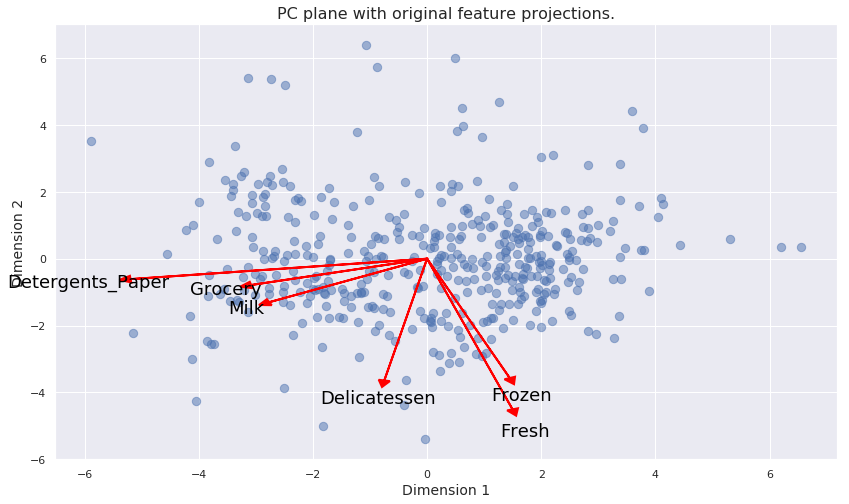

In [184]:
# Create a biplot
vs.biplot(good_data, reduced_data, pca)

### Observation

Once we have the original feature projections (in red), it is easier to interpret the relative position of each data point in the scatterplot. For instance, a point the lower right corner of the figure will likely correspond to a customer that spends a lot on `'Milk'`, `'Grocery'` and `'Detergents_Paper'`, but not so much on the other product categories. 

From the biplot, which of the original features are most strongly correlated with the first component? What about those that are associated with the second component? Do these observations agree with the pca_results plot you obtained earlier?

## Clustering

In this section, you will choose to use either a K-Means clustering algorithm or a Gaussian Mixture Model clustering algorithm to identify the various customer segments hidden in the data. You will then recover specific data points from the clusters to understand their significance by transforming them back into their original dimension and scale. 

### Question 6

* What are the advantages to using a K-Means clustering algorithm? 
* What are the advantages to using a Gaussian Mixture Model clustering algorithm? 
* Given your observations about the wholesale customer data so far, which of the two algorithms will you use and why?

** Hint: ** Think about the differences between hard clustering and soft clustering and which would be appropriate for our dataset.

**Answer:**

* What are the advantages to using a K-Means clustering algorithm? 

**Pros:**
* Finds cluster centers that minimize condiHonal variance (good representaHon of data)
* Simple and fast
* Easy to implement 

**Cons:**
* Need to choose K
* Sensitive to outliers
* Prone to local minima
* All clusters have the same parameters (e.g., distance measure is non- adapHve)
* Can be slow: each iteraHon is O(KNd) for N d-dimensional points

http://vision.stanford.edu/teaching/cs131_fall1314_nope/lectures/lecture13_kmeans_cs131.pdf
http://stp.lingfil.uu.se/~santinim/ml/2016/Lect_10/10c_UnsupervisedMethods.pdf
http://www.math.sjsu.edu/~gchen/Math285F15/MATH285_Project_Report_Weiqian.pdf


* What are the advantages to using a Gaussian Mixture Model clustering algorithm? 

**Pros:**

* Speed:	it is the fastest algorithm for learning mixture models
* Agnostic:	as this algorithm maximizes only the likelihood, it will not bias the means towards zero, or bias the cluster sizes to have specific structures that might or might not apply.

**Cons:**

* Singularities:	when one has insufficiently many points per mixture, estimating the covariance matrices becomes difficult, and the algorithm is known to diverge and find solutions with infinite likelihood unless one regularizes the covariances artificially.
* Number of components:this algorithm will always use all the components it has access to, needing held-out data or information theoretical criteria to decide how many components to use in the absence of external cues.
    
http://ogrisel.github.io/scikit-learn.org/sklearn-tutorial/modules/mixture.html#pros-and-cons-of-class-gmm-expectation-maximization-inference

* Given your observations about the wholesale customer data so far, which of the two algorithms will you use and why?

K-means uses hard clustering (see https://sandipanweb.wordpress.com/2017/03/19/hard-soft-clustering-with-k-means-weighted-k-means-and-gmm-em/) and GMM uses soft clustering. 
K means does not work well with complex geometrical clusters whereas GMM works  well with non-linear distributions.
GMM is not scalable (see https://scikit-learn.org/stable/modules/clustering.html) and therefore is good enough to use in this scenario, whereas k-means is used for large data sets. GMM should be adequate to use for this data set.

https://scikit-learn.org/stable/modules/clustering.html
https://stats.stackexchange.com/questions/372477/comparing-k-means-and-expectation-maximization-on-the-dataset-generated-when-d
https://sandipanweb.wordpress.com/2017/03/19/hard-soft-clustering-with-k-means-weighted-k-means-and-gmm-em/

### Implementation: Creating Clusters
Depending on the problem, the number of clusters that you expect to be in the data may already be known. When the number of clusters is not known *a priori*, there is no guarantee that a given number of clusters best segments the data, since it is unclear what structure exists in the data — if any. However, we can quantify the "goodness" of a clustering by calculating each data point's *silhouette coefficient*. The [silhouette coefficient](http://scikit-learn.org/stable/modules/generated/sklearn.metrics.silhouette_score.html) for a data point measures how similar it is to its assigned cluster from -1 (dissimilar) to 1 (similar). Calculating the *mean* silhouette coefficient provides for a simple scoring method of a given clustering.

In the code block below, you will need to implement the following:
 - Fit a clustering algorithm to the `reduced_data` and assign it to `clusterer`.
 - Predict the cluster for each data point in `reduced_data` using `clusterer.predict` and assign them to `preds`.
 - Find the cluster centers using the algorithm's respective attribute and assign them to `centers`.
 - Predict the cluster for each sample data point in `pca_samples` and assign them `sample_preds`.
 - Import `sklearn.metrics.silhouette_score` and calculate the silhouette score of `reduced_data` against `preds`.
   - Assign the silhouette score to `score` and print the result.

In [185]:
from sklearn.mixture import GaussianMixture
from sklearn.metrics import silhouette_score


def clusterScore(numCluster):
# TODO: Apply your clustering algorithm of choice to the reduced data 
    clusterer = GaussianMixture(n_components=numCluster, covariance_type='full', random_state=42).fit(reduced_data)

# TODO: Predict the cluster for each data point
    preds = clusterer.predict(reduced_data)

# TODO: Find the cluster centers
    centers = clusterer.means_

# TODO: Predict the cluster for each transformed sample data point
    sample_preds = clusterer.predict(pca_samples)
        
# TODO: Calculate the mean silhouette coefficient for the number of clusters chosen
    score = silhouette_score(reduced_data, preds)
    
    return score, preds, centers, sample_preds

#score = score_clustering(reduced_data, num_clusters)
for numCluster in range(2, 20):
    score, preds, centers, sample_preds = clusterScore(numCluster)
    print("score: {}; number of clusters: {}; sample_pred: {}".format(score,numCluster,sample_preds))
        


score: 0.42132306742459297; number of clusters: 2; sample_pred: [1 1 1]
score: 0.3119799433051406; number of clusters: 3; sample_pred: [1 1 2]
score: 0.20970962920531552; number of clusters: 4; sample_pred: [0 0 1]
score: 0.2479342532736536; number of clusters: 5; sample_pred: [4 4 2]
score: 0.3120442126052634; number of clusters: 6; sample_pred: [4 4 2]
score: 0.31491725197288484; number of clusters: 7; sample_pred: [4 4 6]
score: 0.29435915204964963; number of clusters: 8; sample_pred: [3 3 7]
score: 0.2959860109699067; number of clusters: 9; sample_pred: [3 3 7]
score: 0.31967831963817017; number of clusters: 10; sample_pred: [3 3 6]
score: 0.3088642129589494; number of clusters: 11; sample_pred: [3 8 6]
score: 0.3141046908656978; number of clusters: 12; sample_pred: [3 8 6]
score: 0.32554214460351305; number of clusters: 13; sample_pred: [3 8 6]
score: 0.3250547042661929; number of clusters: 14; sample_pred: [ 3  8 13]
score: 0.34165505134754476; number of clusters: 15; sample_pred

### Question 7

* Report the silhouette score for several cluster numbers you tried. 
* Of these, which number of clusters has the best silhouette score?

**Answer:**

Of these, which number of clusters has the best silhouette score?

The number of clusters that score the highest is 2 with a Silhouette score of: 0.42132306742459297


### Cluster Visualization
Once you've chosen the optimal number of clusters for your clustering algorithm using the scoring metric above, you can now visualize the results by executing the code block below. Note that, for experimentation purposes, you are welcome to adjust the number of clusters for your clustering algorithm to see various visualizations. The final visualization provided should, however, correspond with the optimal number of clusters. 

score: 0.42132306742459297; number of clusters: 2


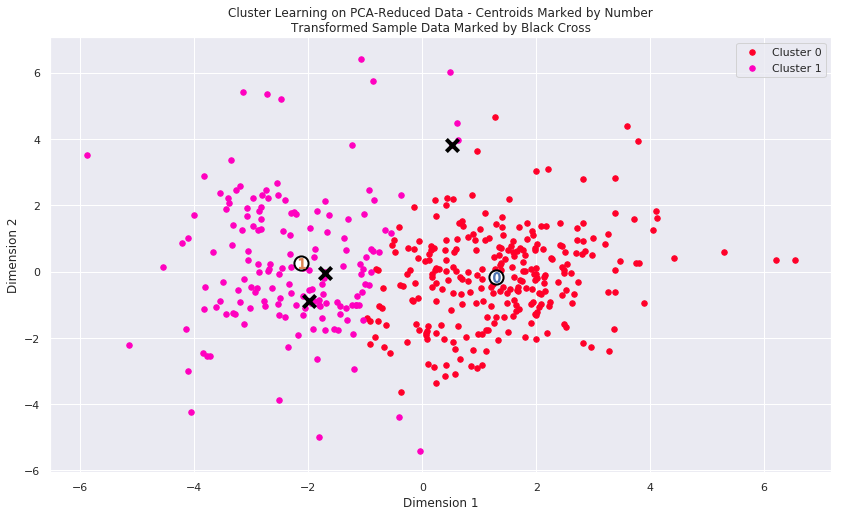

In [186]:
# Display the results of the clustering from implementation
score, preds, centers, sample_preds = clusterScore(2)

#score = score_clustering(reduced_data, num_clusters)
print("score: {}; number of clusters: {}".format(score,2))

vs.cluster_results(reduced_data, preds, centers, pca_samples)

### Implementation: Data Recovery
Each cluster present in the visualization above has a central point. These centers (or means) are not specifically data points from the data, but rather the *averages* of all the data points predicted in the respective clusters. For the problem of creating customer segments, a cluster's center point corresponds to *the average customer of that segment*. Since the data is currently reduced in dimension and scaled by a logarithm, we can recover the representative customer spending from these data points by applying the inverse transformations.

In the code block below, you will need to implement the following:
 - Apply the inverse transform to `centers` using `pca.inverse_transform` and assign the new centers to `log_centers`.
 - Apply the inverse function of `np.log` to `log_centers` using `np.exp` and assign the true centers to `true_centers`.


In [187]:
# TODO: Inverse transform the centers
log_centers = pca.inverse_transform(centers)

# TODO: Exponentiate the centers
true_centers = np.exp(log_centers)

# Display the true centers
segments = ['Segment {}'.format(i) for i in range(0,len(centers))]
true_centers = pd.DataFrame(np.round(true_centers), columns = data.keys())
true_centers.index = segments
display(true_centers)

Fresh    Milk  Grocery  Frozen  Detergents_Paper  Delicatessen
Segment 0  9260.0  2129.0   2745.0  2101.0             361.0         771.0
Segment 1  3417.0  7606.0  11802.0   839.0            4401.0         897.0

### Question 8

* Consider the total purchase cost of each product category for the representative data points above, and reference the statistical description of the dataset at the beginning of this project(specifically looking at the mean values for the various feature points). What set of establishments could each of the customer segments represent?

**Hint:** A customer who is assigned to `'Cluster X'` should best identify with the establishments represented by the feature set of `'Segment X'`. Think about what each segment represents in terms their values for the feature points chosen. Reference these values with the mean values to get some perspective into what kind of establishment they represent.

**Answer:**

In segment 0, the fresh products spending is lower the mean 12000.29, grocery and milk are also lower than the mean. Delicatessen and detergents paper is also lower than the mean spending. This segment could represent a small family restaurants.

For segment 1, the money spent on fresh products in much lower than the mean, but groceries expenditures are much more higher than the mean of 7951.3, milk spending is also much higher than mean 5796.2. Detergents paper expenditure is also higher than the mean. This could represent a large grocery store.


The mean values are as follows:
Fresh: 12000.2977
Milk: 5796.2
Grocery: 7951.3
Detergents_paper: 2881.4
Delicatessen: 1524.8



### Question 9

* For each sample point, which customer segment from* **Question 8** *best represents it? 
* Are the predictions for each sample point consistent with this?

Run the code block below to find which cluster each sample point is predicted to be.

In [188]:
# Display the predictions
for i, pred in enumerate(sample_preds):
    print("Sample point", i, "predicted to be in Cluster", pred)

Sample point 0 predicted to be in Cluster 1
Sample point 1 predicted to be in Cluster 1
Sample point 2 predicted to be in Cluster 1


**Answer:**

For each sample point, which customer segment from* Question 8 *best represents it?

All sample points fall in the cluster 1 category category, which makes me believe that they can be considered belonging to the large grocery stores segment

Are the predictions for each sample point consistent with this?

sample point 0: would be a restaurant but that does not match the prediction listed above


Sample point 1: this value seems to be predicted correctly, since my origina thought was that it was a grocery store.


Sample point 2: this prediction is also off since my prediction was that this sample point was a food truck

0:  2669	9656	7561	214	  2674	1338
1:	3366	5403	12974	4400  5977	1744
2:	2787	1698	2510	65	  477	52




## Conclusion

In this final section, you will investigate ways that you can make use of the clustered data. First, you will consider how the different groups of customers, the ***customer segments***, may be affected differently by a specific delivery scheme. Next, you will consider how giving a label to each customer (which *segment* that customer belongs to) can provide for additional features about the customer data. Finally, you will compare the ***customer segments*** to a hidden variable present in the data, to see whether the clustering identified certain relationships.

### Question 10
Companies will often run [A/B tests](https://en.wikipedia.org/wiki/A/B_testing) when making small changes to their products or services to determine whether making that change will affect its customers positively or negatively. The wholesale distributor is considering changing its delivery service from currently 5 days a week to 3 days a week. However, the distributor will only make this change in delivery service for customers that react positively. 

* How can the wholesale distributor use the customer segments to determine which customers, if any, would react positively to the change in delivery service?*

**Hint:** Can we assume the change affects all customers equally? How can we determine which group of customers it affects the most?

**Answer:**

How can the wholesale distributor use the customer segments to determine which customers, if any, would react positively to the change in delivery service?

Based on the market segmentation generated, the customer can say that if they change the delivery schedule from 5 days
to 3 days for segment 0 (small family restaurant) that it may affect them negatively since they rely on delivery of fresh products every day to serve their patrons.  For a large grocery store, delivering 3 days a week may save some money since they do have more resources as far as refrigeration. They have the capacity to refrigerate and keep products around a lot longer whereas a small restaurants uses products groceries, fresh products and detergents paper on a daily basis. They need to keep the inventory of products low since they have less monetary resources,the cost of electricity can be steep to refrigerate various products. We cannot assume that the changes will affect the customers equally. We have to look in which category they fall and how far from the clusters center point they are. These are just guesses on my part, but using A/B test testing would be very useful, by maybe offering delivery discounts to similar businesses and gathering feedback, or maybe offering discount prices if they choose one type of delivery versus another.

**Answer to Review Feedback:**

*Feedback: You are on the right track with your intuition that the proposed change will impact the customers in different segments differently, but could you also briefly describe the implementation of A/B testing to verify your hypothesis?
In particular, please state precisely how many A/B tests that you would need to run, and identify the experimental and control groups for each test.

A/B test steps: 

* Pick one variable to test (Delivery frequency).
* Identify your goal (null hypothesis to prove or disprove).
* Create a 'control' and a 'challenger.' (experimental and control groups for segments 0 and 1)
* Split your sample groups equally and randomly.
* Determine your sample size (if applicable)
* Decide how significant your results need to be (p <= 0.05: reject null hypothesis).
* Make sure you're only running one test at a time on any campaign (only testing the delivery frequency)
* Give the A/B test enough time to produce useful data (10 to 20 days maybe more ?)
* Ask for feedback from real users. (satisfaction levels logged in company's servers)
* Focus on your goal metric (
* Measure the significance of your results
* Take action (either implement or not the delivery plan)

(source: https://blog.hubspot.com/marketing/how-to-do-a-b-testing)

As per the defininition of A/B testing a small random sample of the population that produce statistically significant results should be selected. Small random sample from each cluters 0 and 1 can therefore be selected. There will be 2 A/B tests: one for segment 0 and another for segment 1 (the tests are same, just target different segments). Segment 0 will have 1 experimental and 1 control group. Segment 1 will also have 1 experimental and 1 control group. One variable will be used, namely the delivery frequency. The metric for evaluating the p value could the number of positive/negative feedback (satisfaction level) gathered from customers by the the wholesale company's servers.

Null hypothesis for segment 0: The delivery frequency change will not affect segment 0 (if p <= 0.05 the null hypothesis is rejected)

Null hypothesis for segment 1: The delivery frequency change will not affect segment 1 (if p <= 0.05 the null hypothesis is rejected)

The A/B tests for both groups can be run for 10 to 20 days (may be more).

From the results of the A/B testing (rejection/acceptance of hyothesis), we will be able to conclude with reasonable certainty if the changes will affect the customers (from segment 0 an 1) equally or not.



### Question 11
Additional structure is derived from originally unlabeled data when using clustering techniques. Since each customer has a ***customer segment*** it best identifies with (depending on the clustering algorithm applied), we can consider *'customer segment'* as an **engineered feature** for the data. Assume the wholesale distributor recently acquired ten new customers and each provided estimates for anticipated annual spending of each product category. Knowing these estimates, the wholesale distributor wants to classify each new customer to a ***customer segment*** to determine the most appropriate delivery service.  
* How can the wholesale distributor label the new customers using only their estimated product spending and the **customer segment** data?

**Hint:** A supervised learner could be used to train on the original customers. What would be the target variable?

**Answer:**

How can the wholesale distributor label the new customers using only their estimated product spending and the customer segment data?

A supervised learner could be used to train on the original customers and use customer products (fresh,Milk,...) as independant variables and the customer segments as labels (target variables). 



### Visualizing Underlying Distributions

At the beginning of this project, it was discussed that the `'Channel'` and `'Region'` features would be excluded from the dataset so that the customer product categories were emphasized in the analysis. By reintroducing the `'Channel'` feature to the dataset, an interesting structure emerges when considering the same PCA dimensionality reduction applied earlier to the original dataset.

Run the code block below to see how each data point is labeled either `'HoReCa'` (Hotel/Restaurant/Cafe) or `'Retail'` the reduced space. In addition, you will find the sample points are circled in the plot, which will identify their labeling.

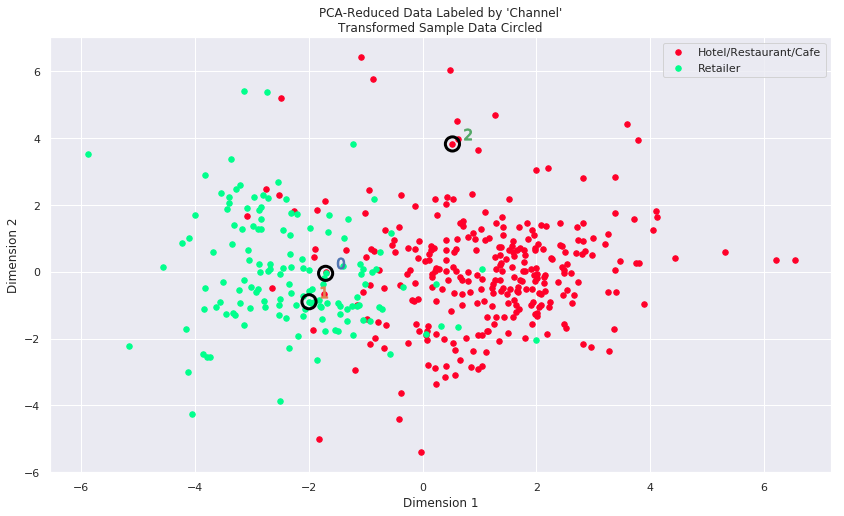

In [189]:
# Display the clustering results based on 'Channel' data
vs.channel_results(reduced_data, outliers, pca_samples)

### Question 12

* How well does the clustering algorithm and number of clusters you've chosen compare to this underlying distribution of Hotel/Restaurant/Cafe customers to Retailer customers? 
* Are there customer segments that would be classified as purely 'Retailers' or 'Hotels/Restaurants/Cafes' by this distribution? 
* Would you consider these classifications as consistent with your previous definition of the customer segments?

**Answer:**

* How well does the clustering algorithm and number of clusters you've chosen compare to this underlying distribution of Hotel/Restaurant/Cafe customers to Retailer customers?

The clustering algorithm and number of clusters I have chosen ressembles this underlying distribution of Hotel/Restaurant/Cafe customers to Retailer customers. We can see that there are two clusters and our model suggested to use two clusters also (see Silhoutte score). 

* Are there customer segments that would be classified as purely 'Retailers' or 'Hotels/Restaurants/Cafes' by this distribution?

By this distribution, it is somewhat hard to determine if customers segments that would classify as 'purely' Retailers or Hotels/Restaurant/Cafes by this distribution. I don't see a clear separation for certains data points.

* Would you consider these classifications as consistent with your previous definition of the customer segments?

I consider these classifications as consistent with my previous definition of customer segments. 


> **Note**: Once you have completed all of the code implementations and successfully answered each question above, you may finalize your work by exporting the iPython Notebook as an HTML document. You can do this by using the menu above and navigating to  
**File -> Download as -> HTML (.html)**. Include the finished document along with this notebook as your submission.